In [2]:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [55]:

X_train.shape

(60000, 28, 28)

In [5]:

single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

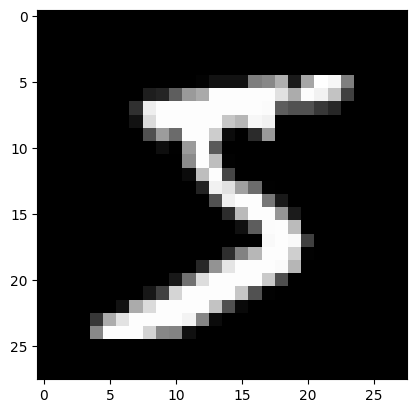

In [7]:

plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:

X_train.max()

255

In [56]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [34]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onesot = utils.to_categorical(y_test,10)

In [35]:
type(y_train_onehot)

numpy.ndarray

In [36]:
y_train_onehot.shape


(60000, 10)

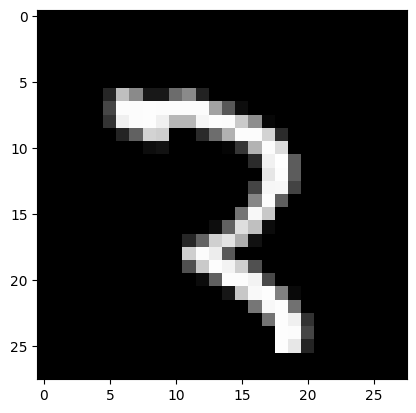

In [37]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [38]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [20]:

X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [39]:
print("ROSHINI.R.K\n212222230123")


ROSHINI.R.K
212222230123


In [40]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=32,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))

In [41]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │         147,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,618 (596.16 KB)

 Trainable params: 152,618 (596.16 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:

model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 80ms/step - accuracy: 0.8730 - loss: 0.4211 - val_accuracy: 0.9805 - val_loss: 0.0630
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 115s 115ms/step - accuracy: 0.9819 - loss: 0.0609 - val_accuracy: 0.9834 - val_loss: 0.0567
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 99s 70ms/step - accuracy: 0.9879 - loss: 0.0381 - val_accuracy: 0.9842 - val_loss: 0.0475
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 69ms/step - accuracy: 0.9915 - loss: 0.0274 - val_accuracy: 0.9873 - val_loss: 0.0401
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 66ms/step - accuracy: 0.9932 - loss: 0.0218 - val_accuracy: 0.9866 - val_loss: 0.0416


<Axes: >

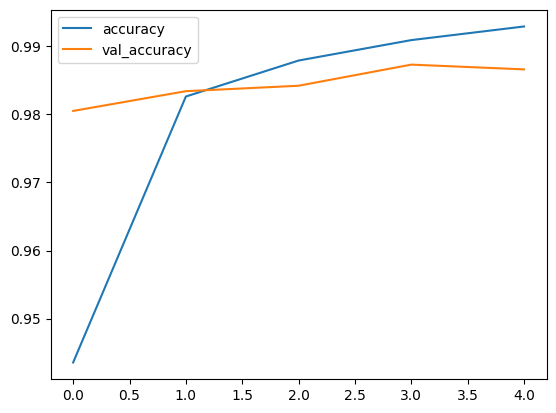

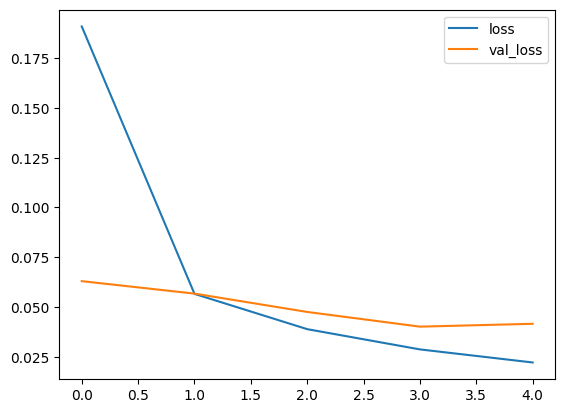

In [54]:
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()

In [45]:
metrics = pd.DataFrame(model.history.history)
metrics.head()


,accuracy,loss,val_accuracy,val_loss
0,0.943567,0.190912,0.9805,0.062993
1,0.982617,0.056599,0.9834,0.056732
2,0.987900,0.038881,0.9842,0.047523
3,0.990900,0.028710,0.9873,0.040143
4,0.992900,0.022145,0.9866,0.041577


In [47]:
x_test_predictions = np.argmax(model.predict(X_test_scaled),axis=1)

print(confusion_matrix(y_test,x_test_predictions))
print(classification_report(y_test,x_test_predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
[[ 975    0    0    1    0    1    3    0    0    0]
 [   0 1129    1    2    1    0    1    0    1    0]
 [   6    2  996    0    3    0    2   19    3    1]
 [   1    0    1  994    0    6    0    3    4    1]
 [   1    0    0    0  975    0    1    0    0    5]
 [   0    0    1    6    0  884    1    0    0    0]
 [   4    2    0    1    1    3  947    0    0    0]
 [   1    1    2    1    1    0    0 1015    1    6]
 [   4    0    2    1    0    1    2    3  959    2]
 [   3    1    0    0    7    1    0    2    3  992]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99      

In [51]:
img = image.load_img('image.png')
type(img)

PIL.Image.Image

In [52]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_scaled = img_28_gray.numpy()/255.0
x_single_prediction = np.argmax(model.predict(img_scaled.reshape(1,28,28,1)),axis=1)
print(x_single_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[3]


[3]


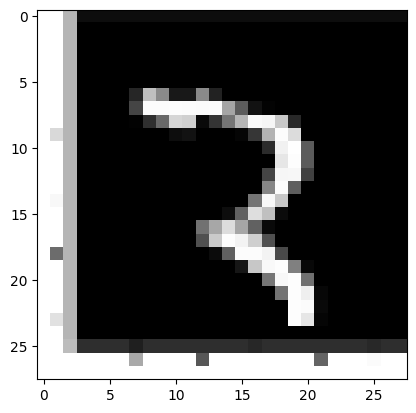

In [57]:
plt.imshow(img_scaled.reshape(28,28),cmap='gray')
img_inv = 255.0 - img_28_gray
img_inv_scaled = img_inv.numpy()/255.0
print(x_single_prediction)